### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

def formatear(numero):
    return "{:,.0f}".format(numero).replace(",", ".")

print("Ingreso total Tienda 1:", formatear(ingreso_tienda1))
print("Ingreso total Tienda 2:", formatear(ingreso_tienda2))
print("Ingreso total Tienda 3:", formatear(ingreso_tienda3))
print("Ingreso total Tienda 4:", formatear(ingreso_tienda4))

Ingreso total Tienda 1: 1.150.880.400
Ingreso total Tienda 2: 1.116.343.500
Ingreso total Tienda 3: 1.098.019.600
Ingreso total Tienda 4: 1.038.375.700


# 2. Ventas por categoría

In [ ]:
def ventas_por_categoria(df, nombre_tienda):
    ventas = df.groupby('Categoría del Producto')['Precio'].sum().reset_index()
    ventas['Ingreso Total'] = ventas['Precio'].apply(formatear)
    ventas['Tienda'] = nombre_tienda
    return ventas[['Tienda', 'Categoría del Producto', 'Ingreso Total']]

In [ ]:
ventas_t1 = ventas_por_categoria(tienda, 'Tienda 1')
ventas_t2 = ventas_por_categoria(tienda2, 'Tienda 2')
ventas_t3 = ventas_por_categoria(tienda3, 'Tienda 3')
ventas_t4 = ventas_por_categoria(tienda4, 'Tienda 4')

In [ ]:
ventas_total = pd.concat([ventas_t1, ventas_t2, ventas_t3, ventas_t4], ignore_index=True)
print("\nVentas por categoría en cada tienda:")
print(ventas_total)


Ventas por categoría en cada tienda:
      Tienda   Categoría del Producto Ingreso Total
0   Tienda 1  Artículos para el hogar    12.698.400
1   Tienda 1     Deportes y diversión    39.290.000
2   Tienda 1        Electrodomésticos   363.685.200
3   Tienda 1             Electrónicos   429.493.500
4   Tienda 1   Instrumentos musicales    91.299.000
5   Tienda 1                 Juguetes    17.995.700
6   Tienda 1                   Libros     8.784.900
7   Tienda 1                  Muebles   187.633.700
8   Tienda 2  Artículos para el hogar    14.746.900
9   Tienda 2     Deportes y diversión    34.744.500
10  Tienda 2        Electrodomésticos   348.567.800
11  Tienda 2             Electrónicos   410.831.100
12  Tienda 2   Instrumentos musicales   104.990.300
13  Tienda 2                 Juguetes    15.945.400
14  Tienda 2                   Libros    10.091.200
15  Tienda 2                  Muebles   176.426.300
16  Tienda 3  Artículos para el hogar    15.060.000
17  Tienda 3     Deportes 

# 3. Calificación promedio de la tienda


In [ ]:
promedio_t1 = tienda['Calificación'].mean()
promedio_t2 = tienda2['Calificación'].mean()
promedio_t3 = tienda3['Calificación'].mean()
promedio_t4 = tienda4['Calificación'].mean()

promedio_t1 = round(promedio_t1, 2)
promedio_t2 = round(promedio_t2, 2)
promedio_t3 = round(promedio_t3, 2)
promedio_t4 = round(promedio_t4, 2)

In [ ]:
resumen_calificacion = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación': [promedio_t1, promedio_t2, promedio_t3, promedio_t4]})

print("\nCalificación promedio por tienda:")
print(resumen_calificacion)




Calificación promedio por tienda:
     Tienda  Calificación
0  Tienda 1          3.98
1  Tienda 2          4.04
2  Tienda 3          4.05
3  Tienda 4          4.00


# 4. Productos más y menos vendidos

In [ ]:
def productos_extremos(df, nombre_tienda, top_n=3):
    # Agrupar los datos por producto y sumar el ingreso total
    ventas = df.groupby('Producto')['Precio'].sum().reset_index()

    # Ordenar de mayor a menor
    ventas = ventas.sort_values('Precio', ascending=False)

    # Formatear ingresos
    ventas['Ingreso Total'] = ventas['Precio'].apply(formatear)

    # Obtener los productos más y menos vendidos
    mas_vendidos = ventas.head(top_n)
    menos_vendidos = ventas.tail(top_n)

    # Imprimir resultados
    print(f"\n {nombre_tienda}")
    print(" Productos más vendidos (por ingreso):")
    print(mas_vendidos[['Producto', 'Ingreso Total']])
    print("\n Productos menos vendidos (por ingreso):")
    print(menos_vendidos[['Producto', 'Ingreso Total']])

# --- 4️⃣ Ejecutar la función para cada tienda ---
productos_extremos(tienda, "Tienda 1")
productos_extremos(tienda2, "Tienda 2")
productos_extremos(tienda3, "Tienda 3")
productos_extremos(tienda4, "Tienda 4")



 Tienda 1
 Productos más vendidos (por ingreso):
         Producto Ingreso Total
48  TV LED UHD 4K   142.150.200
39   Refrigerador   112.143.300
25      Iphone 15    97.902.200

 Productos menos vendidos (por ingreso):
              Producto Ingreso Total
16     Cubo mágico 8x8       696.900
19      Dinosaurio Rex       688.900
17  Cuerda para saltar       652.800

 Tienda 2
 Productos más vendidos (por ingreso):
         Producto Ingreso Total
25      Iphone 15   113.225.800
48  TV LED UHD 4K   103.375.000
39   Refrigerador    97.632.500

 Productos menos vendidos (por ingreso):
              Producto Ingreso Total
17  Cuerda para saltar       856.900
19      Dinosaurio Rex       770.300
16     Cubo mágico 8x8       643.600

 Tienda 3
 Productos más vendidos (por ingreso):
         Producto Ingreso Total
39   Refrigerador    99.889.700
48  TV LED UHD 4K    96.669.100
25      Iphone 15    93.225.700

 Productos menos vendidos (por ingreso):
              Producto Ingreso Total
17  Cue

# 5. Envío promedio por tienda

In [ ]:

# Función para formatear con puntos de miles
def formatear(numero):
    return "{:,.0f}".format(numero).replace(",", ".")

# Calcular el costo de envío promedio de cada tienda
envio_t1 = tienda['Costo de envío'].mean()
envio_t2 = tienda2['Costo de envío'].mean()
envio_t3 = tienda3['Costo de envío'].mean()
envio_t4 = tienda4['Costo de envío'].mean()

# Redondear y formatear
envio_t1_fmt = formatear(round(envio_t1, 0))
envio_t2_fmt = formatear(round(envio_t2, 0))
envio_t3_fmt = formatear(round(envio_t3, 0))
envio_t4_fmt = formatear(round(envio_t4, 0))

# Crear un resumen
resumen_envio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Envío Promedio': [envio_t1_fmt, envio_t2_fmt, envio_t3_fmt, envio_t4_fmt]
})

print("\n Envío promedio por tienda:")
print(resumen_envio)


 Envío promedio por tienda:
     Tienda Envío Promedio
0  Tienda 1         26.019
1  Tienda 2         25.216
2  Tienda 3         24.806
3  Tienda 4         23.459


In [ ]:
#Generando las visualizaciones

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

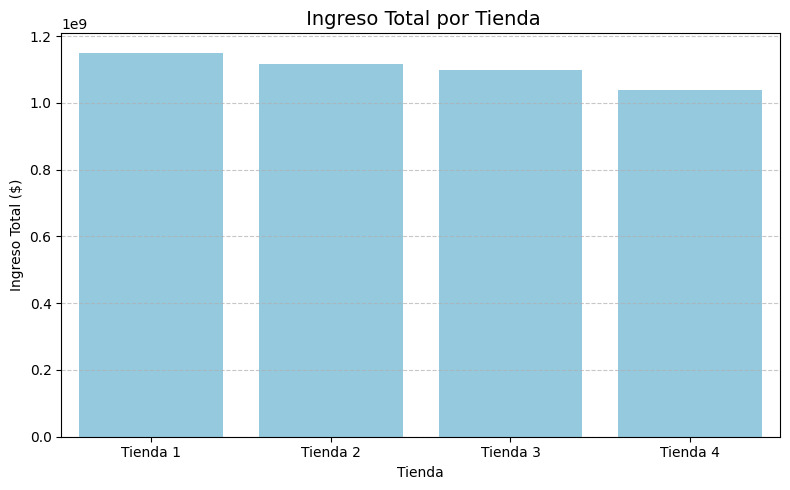

In [ ]:
# Calcular ingresos totales
ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [
        tienda['Precio'].sum(),
        tienda2['Precio'].sum(),
        tienda3['Precio'].sum(),
        tienda4['Precio'].sum()
    ]
}

df_ingresos = pd.DataFrame(ingresos)

# --- Gráfico ---
plt.figure(figsize=(8,5))
sns.barplot(data=df_ingresos, x='Tienda', y='Ingreso Total', color='skyblue')  # Cambié palette por color
plt.title(' Ingreso Total por Tienda', fontsize=14)
plt.ylabel('Ingreso Total ($)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



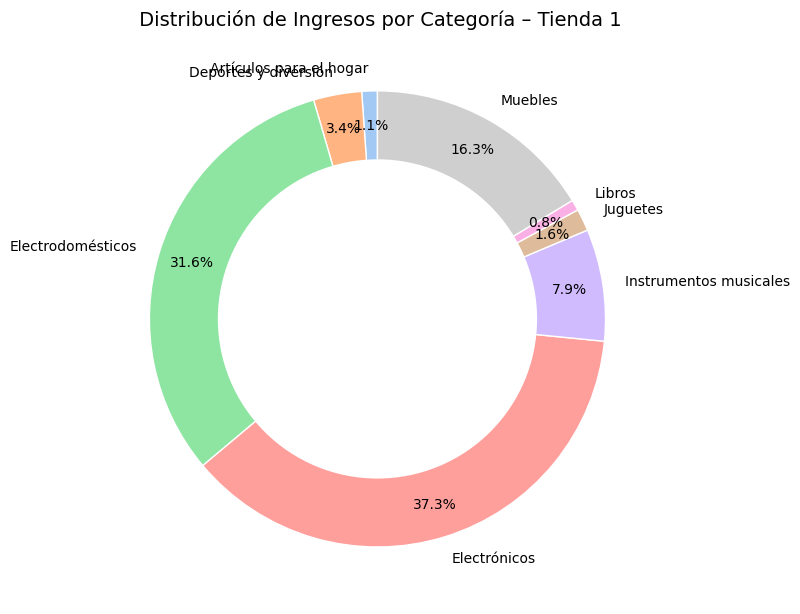

In [ ]:
# Agrupar por categoría para la Tienda 1
categorias = tienda.groupby('Categoría del Producto')['Precio'].sum()

# --- Gráfico ---
plt.figure(figsize=(8,8))

# Configurar etiquetas fuera del gráfico con líneas guía
plt.pie(categorias,
        labels=categorias.index,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,     # Posición del porcentaje más afuera
        labeldistance=1.1,    # Posición de las etiquetas fuera del círculo
        wedgeprops={'edgecolor': 'w'},
        colors=sns.color_palette('pastel'))


centro = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centro)

plt.title(' Distribución de Ingresos por Categoría – Tienda 1', fontsize=14)
plt.tight_layout()
plt.show()



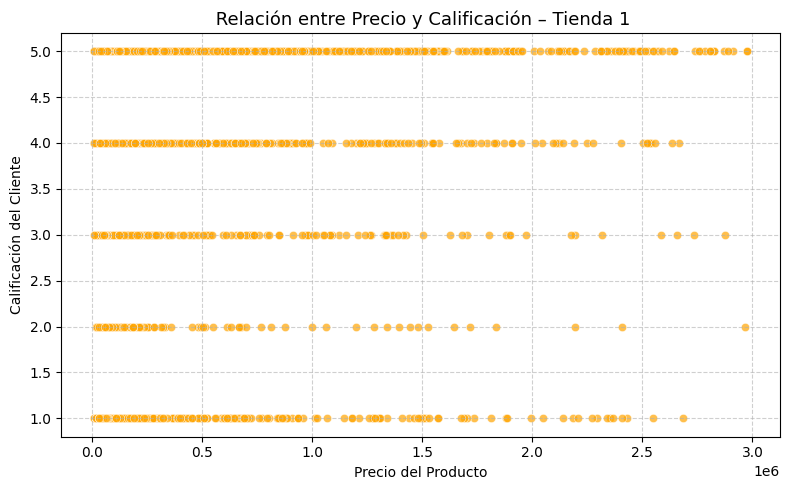

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=tienda, x='Precio', y='Calificación', color='orange', alpha=0.7)
plt.title(' Relación entre Precio y Calificación – Tienda 1', fontsize=13)
plt.xlabel('Precio del Producto')
plt.ylabel('Calificación del Cliente')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


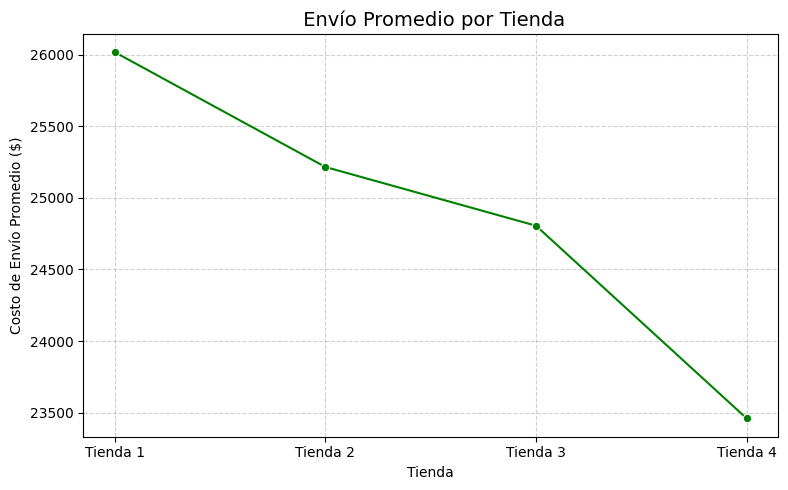

In [ ]:
envio_promedio = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Envío Promedio': [
        tienda['Costo de envío'].mean(),
        tienda2['Costo de envío'].mean(),
        tienda3['Costo de envío'].mean(),
        tienda4['Costo de envío'].mean()
    ]
}

df_envio = pd.DataFrame(envio_promedio)

plt.figure(figsize=(8,5))
sns.lineplot(data=df_envio, x='Tienda', y='Envío Promedio', marker='o', color='green')
plt.title(' Envío Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


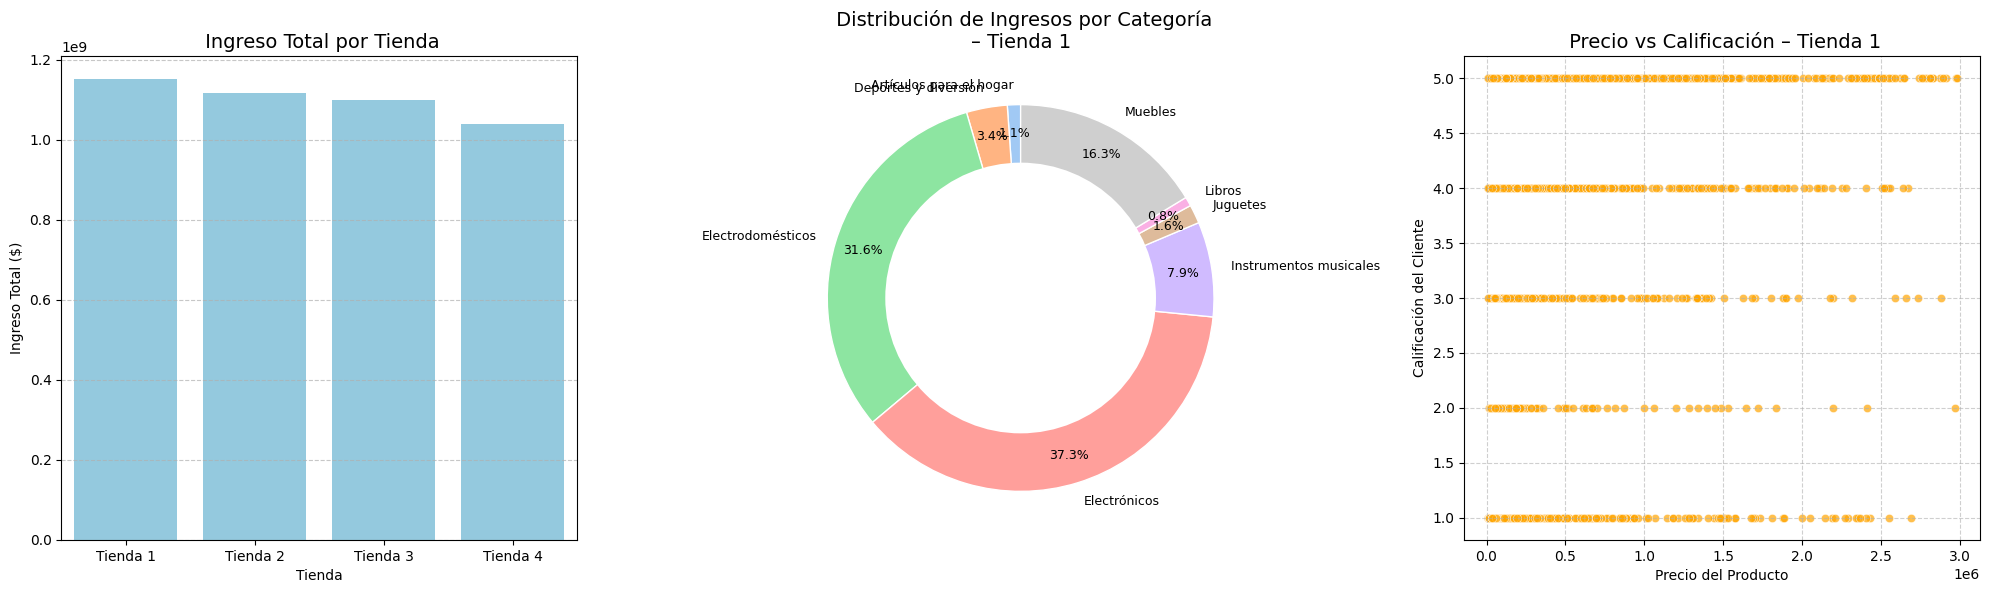

In [ ]:
df_ingresos = pd.DataFrame(ingresos)

# Datos para distribución de categorías (Tienda 1)
categorias = tienda.groupby('Categoría del Producto')['Precio'].sum()

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# --- 1. Gráfico de barras: Ingresos totales ---
sns.barplot(data=df_ingresos, x='Tienda', y='Ingreso Total', color='skyblue', ax=axs[0])
axs[0].set_title(' Ingreso Total por Tienda', fontsize=14)
axs[0].set_ylabel('Ingreso Total ($)')
axs[0].set_xlabel('Tienda')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- 2. Gráfico circular (dona): Distribución por categoría ---
axs[1].pie(categorias,
           labels=categorias.index,
           autopct='%1.1f%%',
           startangle=90,
           pctdistance=0.85,
           labeldistance=1.1,
           wedgeprops={'edgecolor': 'w'},
           colors=sns.color_palette('pastel'),
           textprops={'fontsize': 9})
centro = plt.Circle((0,0), 0.70, fc='white')
axs[1].add_artist(centro)
axs[1].set_title(' Distribución de Ingresos por Categoría\n– Tienda 1', fontsize=14)

# --- 3. Gráfico de dispersión: Precio vs Calificación ---
sns.scatterplot(data=tienda, x='Precio', y='Calificación', color='orange', alpha=0.7, ax=axs[2])
axs[2].set_title(' Precio vs Calificación – Tienda 1', fontsize=14)
axs[2].set_xlabel('Precio del Producto')
axs[2].set_ylabel('Calificación del Cliente')
axs[2].grid(True, linestyle='--', alpha=0.6)

# Ajustar espacios para que no se sobrepongan
plt.tight_layout()
plt.show()